# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [52]:
df = pd.read_csv('../data/states_edu.csv')
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: **Grade 8 Math**

How many years of data are logged in our dataset? 

In [54]:
df['YEAR'].max() - df['YEAR'].min()

np.int64(33)

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [55]:
df[(df['STATE'] == 'MICHIGAN') | (df['STATE'] == 'OHIO')].groupby('STATE')['AVG_MATH_4_SCORE'].mean()

STATE
MICHIGAN    234.363636
OHIO        239.454545
Name: AVG_MATH_4_SCORE, dtype: float64

Find the average for your chosen test across all states in 2019

In [56]:
df[df['YEAR'] == 2019]['AVG_MATH_4_SCORE'].mean()

np.float64(239.9433962264151)

For each state, find a maximum value for your chosen test score

In [57]:
df.groupby('STATE')['AVG_MATH_4_SCORE'].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [123]:
df_new_features = df.copy()
df_new_features = df_new_features.set_index('PRIMARY_KEY')
df_new_features['INSTRUCTION_SPENDING_PER_STUDENT'] = df_new_features['INSTRUCTION_EXPENDITURE'] / df_new_features['ENROLL']
df_new_features['PAST_AVG_MATH_4_SCORE'] = np.full((1715), np.nan)

# https://stackoverflow.com/questions/53297261/iteration-over-the-rows-of-a-pandas-dataframe-as-dictionaries
for row in df_new_features.to_dict(orient='records'):
    key = f"{row['YEAR'] + 4}_{row['STATE']}"
    if key in df_new_features.index.to_list():
        df_new_features.at[key, 'PAST_AVG_MATH_4_SCORE'] = row['AVG_MATH_4_SCORE']

df_new_features.dropna()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,INSTRUCTION_SPENDING_PER_STUDENT,PAST_AVG_MATH_4_SCORE
PRIMARY_KEY,,,,,,,,,,,,,,,,,,,,,
2007_ALABAMA,ALABAMA,2007,743273.0,7069040.0,689072.0,4070949.0,2309019.0,7196459.0,3653466.0,2174210.0,...,46200.0,466414.0,216941.0,742919.0,229.0,266.0,216.0,252.0,4.915376,223.0
2007_ALASKA,ALASKA,2007,132197.0,1800616.0,282270.0,1052357.0,465989.0,1938755.0,927307.0,645857.0,...,10092.0,77676.0,42049.0,131029.0,237.0,283.0,214.0,259.0,7.014584,233.0
2007_ARIZONA,ARIZONA,2007,969875.0,8724434.0,953861.0,4204089.0,3566484.0,8709531.0,3977800.0,2656438.0,...,76275.0,668290.0,316376.0,1087447.0,232.0,276.0,210.0,255.0,4.101353,229.0
2007_ARKANSAS,ARKANSAS,2007,474532.0,4415981.0,483689.0,3319030.0,613262.0,4779308.0,2337748.0,1378576.0,...,30708.0,288518.0,138921.0,479016.0,238.0,274.0,217.0,258.0,4.926429,229.0
2007_CALIFORNIA,CALIFORNIA,2007,6288686.0,72516936.0,7200298.0,42333637.0,22983001.0,73225422.0,34685013.0,20655194.0,...,468281.0,3801685.0,2011865.0,6343471.0,230.0,270.0,209.0,251.0,5.515463,227.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,5075509.0,...,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0,6.841255,245.0
2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,4510672.0,...,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0,6.069762,243.0
2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,1161944.0,...,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0,6.509767,235.0


Feature engineering justification:
- expenditure for each student is important but it's most important what part of that expenditure is going to teaching
- it can help to look at how kids did in the past to predict how well they do in the present, so we can create a feature that contains grade 8 kids' scores when they were in grade 4

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

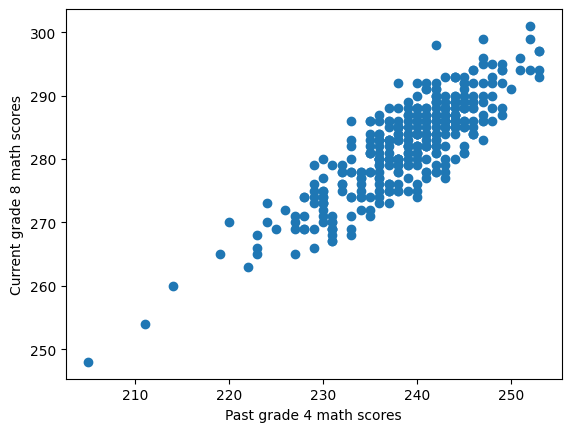

In [125]:
_df = df_new_features[['AVG_MATH_8_SCORE', 'PAST_AVG_MATH_4_SCORE']].dropna()
plt.scatter(_df['PAST_AVG_MATH_4_SCORE'], _df['AVG_MATH_8_SCORE'])
plt.xlabel("Past grade 4 math scores")
plt.ylabel("Current grade 8 math scores")
plt.show()

There is an evident strong positive relationship between past average past grade 4 math scores and average current grade 8 math scores.

**Visualization 2**

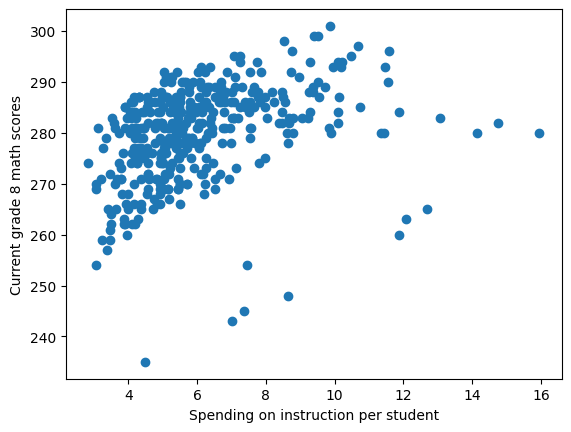

In [195]:
_df = df_new_features[['AVG_MATH_8_SCORE', 'INSTRUCTION_SPENDING_PER_STUDENT']].dropna()
plt.scatter(_df['INSTRUCTION_SPENDING_PER_STUDENT'], _df['AVG_MATH_8_SCORE'])
plt.xlabel("Spending on instruction per student")
plt.ylabel("Current grade 8 math scores")
plt.show()

There is a weak positive relationship between spending on instruction and grade 8 math scores. The previous variable seems to be a better indicator.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [131]:
from sklearn.model_selection import train_test_split

In [143]:
pred_features = ["AVG_MATH_4_SCORE", "PAST_AVG_MATH_4_SCORE", "INSTRUCTION_SPENDING_PER_STUDENT", "AVG_READING_8_SCORE", "AVG_MATH_8_SCORE"]
df_no_na = df_new_features[pred_features].dropna()
X = df_no_na[pred_features[:-1]]
y = df_no_na[pred_features[-1]]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [173]:
# import your sklearn class here
from sklearn.ensemble import RandomForestRegressor

In [182]:
# create your model here
model = RandomForestRegressor()

In [183]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [184]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

RMSE

In [197]:
np.average((y_pred - y_test)**2) ** 0.5

np.float64(2.6953718503695727)

$R^2$ Score

In [201]:
model.score(X_test, y_test)

0.8698186650040649

model.score(y_pred, y_test)

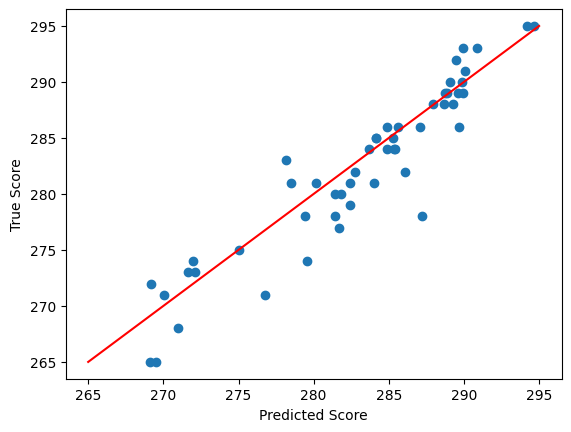

In [189]:
plt.scatter(y_pred, y_test)
plt.plot([265, 295], [265, 295], color="red")
plt.xlabel("Predicted Score")
plt.ylabel("True Score")
plt.show()

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

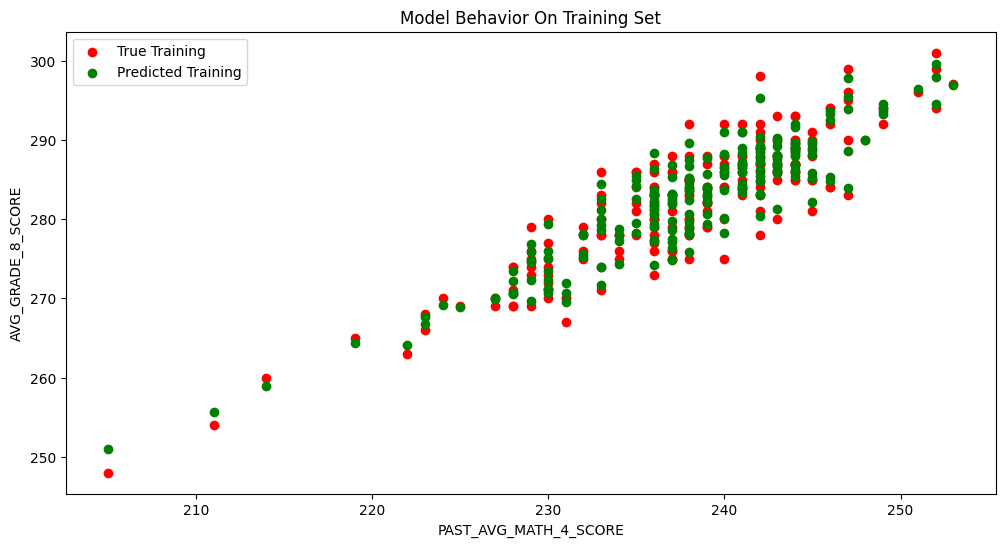

In [192]:
col_name = 'PAST_AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_GRADE_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

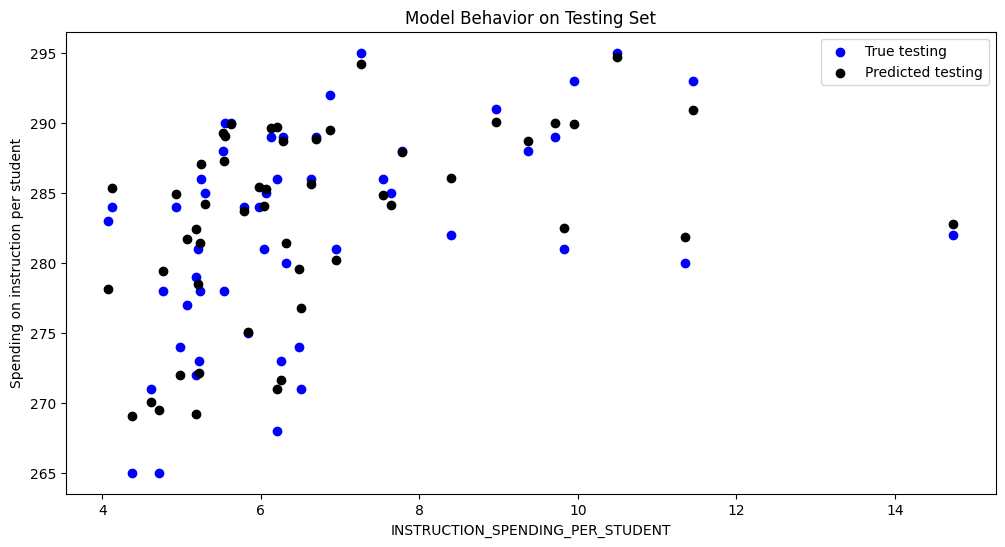

In [194]:
col_name = 'INSTRUCTION_SPENDING_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Spending on instruction per student')
plt.title("Model Behavior on Testing Set")